In [1]:
from helpers import *
from tqdm import notebook

In [11]:
def runsims(alpha = 0.95, num_sim=30, temp = 10, stopK = 0.000001, element="swap", num_searches=100,
            alternate=False, secondary="2opt", beta = 0.2, gamma = 1):
    sim = AnnealTVS(df, K = temp, stopK = stopK, alpha = alpha, elementary=element, num_searches = num_searches,
                    num_sim = num_sim, alternate=alternate, secondary=secondary, beta=beta, gamma=gamma)
    res = sim.run_sim()
    return res

def plot_solution(solution, df):
    df.plot.scatter("x", "y")
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [3]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
     # make it a circle
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

In [4]:
df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = r"[ ]{1,}", index_col=0, engine='python').drop("EOF")
# df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

In [ ]:
sim = AnnealTVS(df, K = 10, num_sim=1,num_searches = 200,stopK = .1, alpha = 0.97, beta = 0.2, gamma = 0.5,
                elementary="2opt", verbose=True, alternate=True, secondary="insert")

In [ ]:
sim.plot_solution()

In [ ]:
res = sim.run_sim()

In [ ]:
sim.total_distance()

In [21]:
num_sims = 16
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 1, num_searches = 800, temp=5,
                                                  stopK=.01, alpha = 0.90, element="insert",
                                                 alternate=True, secondary="2opt", beta=0.8)
                                      for i in range(num_sims))

In [22]:
best_solution = []
best = 1000000
for i in range(len(results_sims)):
    for j in range(len(results_sims[i])):
        distance = total_distance(results_sims[i][j], df)
        if distance < best:
            print(f"i:{i}, j:{j}")
            # update shortest distance
            best = distance
            # store best solution
            best_solution = results_sims[i][j]
            
        # print(total_distance(results_sims[i][j], df))

print(total_distance(best_solution, df))

i:0, j:0
i:6, j:0
2802.6947047402173


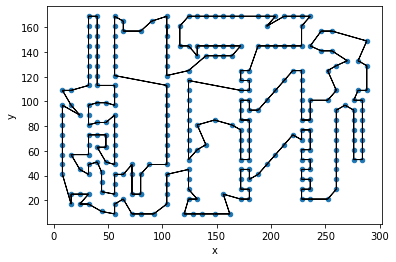

In [23]:
plot_solution(best_solution, df)

In [ ]:
best_solution

In [ ]:
df = pd.read_csv("data/eil51.opt.tour.txt", skiprows=5, names=["cities"], header=None, delimiter = ' ', index_col=0).drop("EOF")
# df = pd.read_csv("data/a280.opt.tour.txt", skiprows=5, names=["cities"], header=None, delimiter = ' ', index_col=0).drop("EOF")
opt_tour = []
for index, row in df.iterrows():
    opt_tour.append(index)
opt_tour.pop()
print(opt_tour)


df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")
# df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")
print(total_distance(opt_tour, df))


In [ ]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i, stopK=.1, element="2opt")
#                                       for i in range(num_sims))

In [ ]:
# total_distance(results_sims[0][0], df)

In [ ]:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))

In [ ]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i*10, stopK=.1, alpha = 0.9, element="insert")
#                                       for i in range(num_sims))

In [ ]:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))

In [ ]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 1, temp=i*10, stopK=.01, alpha = 0.99, element="insert")
#                                       for i in range(num_sims))

In [ ]:
# best_solution:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))